In [5]:
import math

import cv2
import kwimage
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(image: np.ndarray, figsize: tuple[int, int] = (2, 2)) -> None:
    _ = plt.figure(figsize=figsize)

    plt.axis(False)
    plt.imshow(image)

    plt.show()


def get_transform_matrix(
    translation: tuple[int, int] = (0, 0),
    scaling: tuple[float, float] = (1.0, 1.0),
    rotation: float = 0.0,
    shearing: tuple[float, float] = (0.0, 0.0),
    transformation_origin: tuple[int, int] = (0, 0),
) -> np.ndarray:
    matrix = np.eye(3, 3)

    # Change origin
    matrix = (
        np.array(
            [
                [1, 0, -transformation_origin[0]],
                [0, 1, -transformation_origin[1]],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    # Rotate
    matrix = (
        np.array(
            [
                [math.cos(rotation), -math.sin(rotation), 0],
                [math.sin(rotation), math.cos(rotation), 0],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    # Scale
    matrix = (
        np.array(
            [
                [scaling[0], 0, 0],
                [0, scaling[1], 0],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    # Change origin back
    matrix = (
        np.array(
            [
                [1, 0, transformation_origin[0]],
                [0, 1, transformation_origin[1]],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    # Shear
    matrix = (
        np.array(
            [
                [1, shearing[0], 0],
                [shearing[1], 1, 0],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    # Translate
    matrix = (
        np.array(
            [
                [1, 0, translation[0]],
                [0, 1, translation[1]],
                [0, 0, 1],
            ]
        )
        @ matrix
    )

    return matrix

In [45]:
shape = (100, 100)

image = np.zeros(shape, dtype=np.uint16)

image[0 : round(image.shape[0] * 0.8), 0] = 255
image[0, 0 : image.shape[1]] = 255
image[0 : round(image.shape[0] * 0.5), image.shape[1] - 1] = 255
image[round(image.shape[0] * 0.5) - 1, 0 : image.shape[1]] = 255
for i in range(round(image.shape[0] * 0.5) - 1, round(image.shape[1] * 0.8)):
    image[i, i] = 255

# imshow(image)

matrix = get_transform_matrix(
    rotation=math.pi / 2,
    # scaling=(0.7, 0.7),
    transformation_origin=(image.shape[0] // 2, image.shape[1] // 2),
)

array([[ 6.123234e-17,  1.000000e+00, -6.123234e-15],
       [-1.000000e+00,  6.123234e-17,  1.000000e+02],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

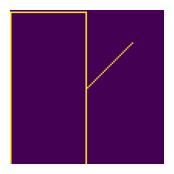

In [52]:
transformed = kwimage.warp_affine(
    image,
    np.vstack([cv2.invertAffineTransform(matrix[:2]), [0, 0, 1]]),
    image.shape[::-1],
    interpolation=cv2.INTER_LINEAR,
    large_warp_dim="auto",
)

imshow(transformed)

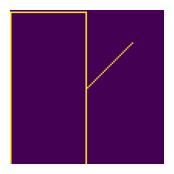

In [54]:
imshow(
    cv2.warpAffine(
        image,
        matrix[:2],
        image.shape[::-1],
        flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
    )
)

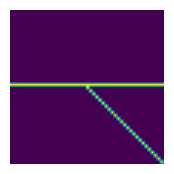

In [84]:
import kwimage

imshow(
    kwimage.warp_affine(
        image,
        matrix,
        image.shape[::-1],
    )
)

### Splitting

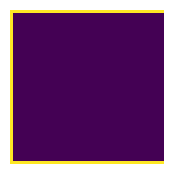

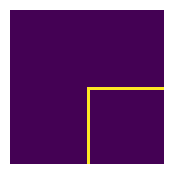

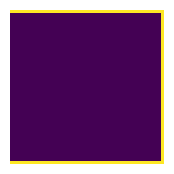

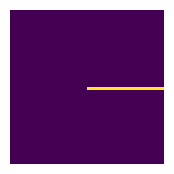

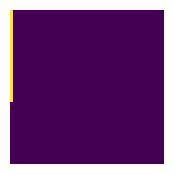

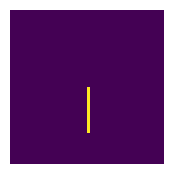

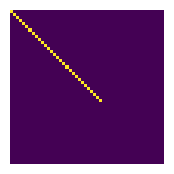

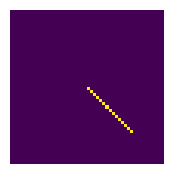

In [71]:
tile1 = image[: image.shape[0] // 2, : image.shape[1] // 2]
tile2 = image[: image.shape[0] // 2, image.shape[1] // 2 :]
tile3 = image[image.shape[0] // 2 :, : image.shape[1] // 2]
tile4 = image[image.shape[0] // 2 :, image.shape[1] // 2 :]

tile1_warped = cv2.warpAffine(
    tile1,
    matrix[:2],
    tile1.shape[::-1],
    flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
)
tile2_warped = cv2.warpAffine(
    tile2,
    matrix[:2],
    tile2.shape[::-1],
    flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
)
tile3_warped = cv2.warpAffine(
    tile3,
    matrix[:2],
    tile3.shape[::-1],
    flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
)
tile4_warped = cv2.warpAffine(
    tile4,
    matrix[:2],
    tile4.shape[::-1],
    flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP,
)

imshow(tile1)
imshow(tile1_warped)
imshow(tile2)
imshow(tile2_warped)
imshow(tile3)
imshow(tile3_warped)
imshow(tile4)
imshow(tile4_warped)